In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('train_update.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,Unnamed: 8,Unnamed: 9,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1.0,60.0,RL,65.0,8450.0,Pave,NaN,Reg,NaN,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2.0,20.0,RL,NaN,9600.0,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3.0,60.0,RL,68.0,NaN,Pave,NaN,IR1,NaN,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4.0,70.0,RL,60.0,NaN,Pave,NaN,NaN,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5.0,60.0,RL,84.0,14260.0,NaN,NaN,NaN,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1454.000000,1455.000000,1196.000000,1451.000000,1458.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,733.455983,56.986254,70.014214,10517.076499,6.098765,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,419.953952,42.338452,24.263559,10009.968582,1.382749,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,370.250000,20.000000,59.000000,7537.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,733.500000,50.000000,69.000000,9453.000000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1096.750000,70.000000,80.000000,11603.000000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


C:\Users\DEll\AppData\Local\Temp\ipykernel_3628\1444281261.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['SalePrice'])


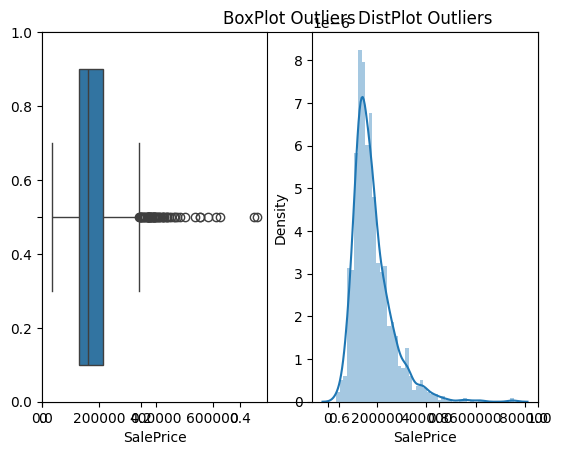

In [14]:
plt.title('BoxPlot Outliers')
plt.subplot(1,2,1)
sns.boxplot(x='SalePrice',data=df)
plt.subplot(1,2,2)
plt.title('DistPlot Outliers')
sns.distplot(df['SalePrice'])
plt.show()

Box Plot Outliers remove

In [16]:
q1=df['SalePrice'].quantile(0.25)
q3=df['SalePrice'].quantile(0.75)
q1,q3

(np.float64(129975.0), np.float64(214000.0))

In [17]:
IQR=q3-q1
IQR

np.float64(84025.0)

In [18]:
max_range=q3+(1.5*IQR)
min_range=q1-(1.5*IQR)
max_range,min_range

(np.float64(340037.5), np.float64(3937.5))

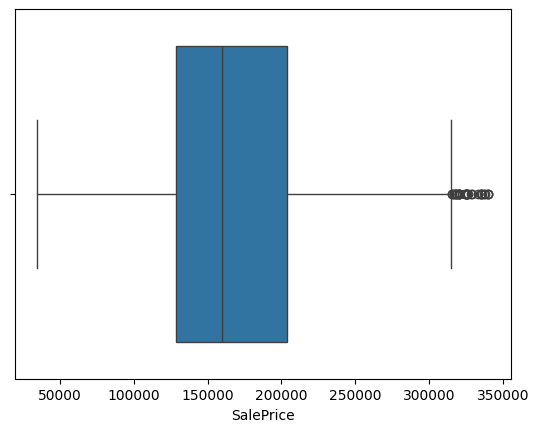

(1399, 81)

In [23]:
new_df=df[df['SalePrice']<max_range]
new_df
sns.boxplot(x='SalePrice',data=new_df)
plt.show()

new_df.shape

Dist Plots Outliers Remove

In [22]:
df=pd.read_csv('train_update.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,Unnamed: 8,Unnamed: 9,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1.0,60.0,RL,65.0,8450.0,Pave,NaN,Reg,NaN,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2.0,20.0,RL,NaN,9600.0,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3.0,60.0,RL,68.0,NaN,Pave,NaN,IR1,NaN,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4.0,70.0,RL,60.0,NaN,Pave,NaN,NaN,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5.0,60.0,RL,84.0,14260.0,NaN,NaN,NaN,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


C:\Users\DEll\AppData\Local\Temp\ipykernel_3628\405221552.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['SalePrice'])


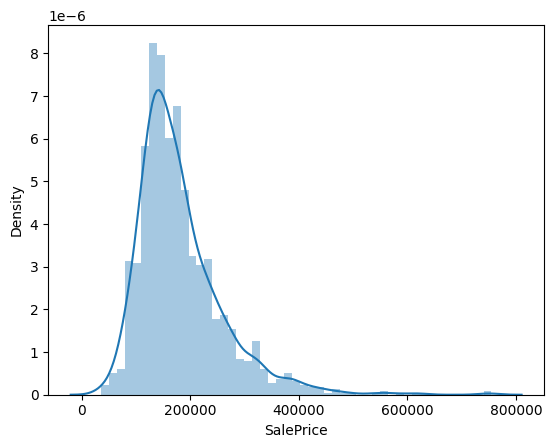

In [26]:
sns.distplot(df['SalePrice'])
plt.show()

In [27]:
min_range=df['SalePrice'].mean()-(3*df['SalePrice'].std())
max_range=df['SalePrice'].mean()+(3*df['SalePrice'].std())
min_range,max_range

(np.float64(-57406.31275824891), np.float64(419248.70453907084))

C:\Users\DEll\AppData\Local\Temp\ipykernel_3628\1286698701.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df1['SalePrice'])


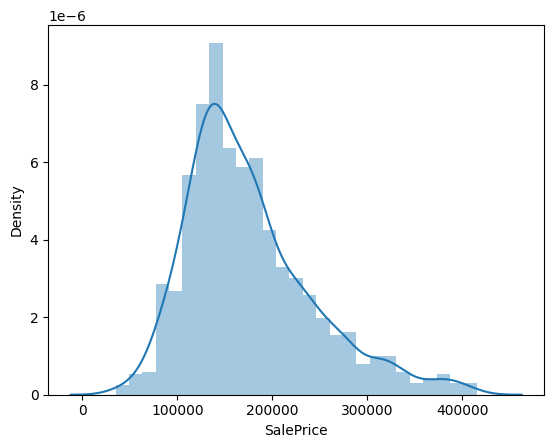

In [29]:
new_df1=df[df['SalePrice']<=max_range]
sns.distplot(new_df1['SalePrice'])
plt.show()

Z_Score Outliers Remove

In [30]:
df=pd.read_csv('train_update.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,Unnamed: 8,Unnamed: 9,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1.0,60.0,RL,65.0,8450.0,Pave,NaN,Reg,NaN,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2.0,20.0,RL,NaN,9600.0,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3.0,60.0,RL,68.0,NaN,Pave,NaN,IR1,NaN,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4.0,70.0,RL,60.0,NaN,Pave,NaN,NaN,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5.0,60.0,RL,84.0,14260.0,NaN,NaN,NaN,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


C:\Users\DEll\AppData\Local\Temp\ipykernel_3628\405221552.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['SalePrice'])


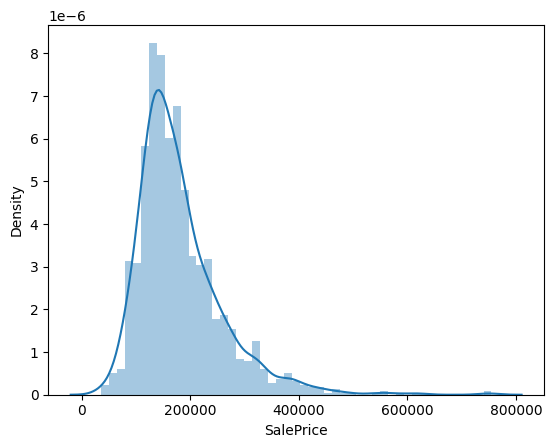

In [31]:
sns.distplot(df['SalePrice'])
plt.show()

C:\Users\DEll\AppData\Local\Temp\ipykernel_3628\1706260217.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df2['SalePrice'])


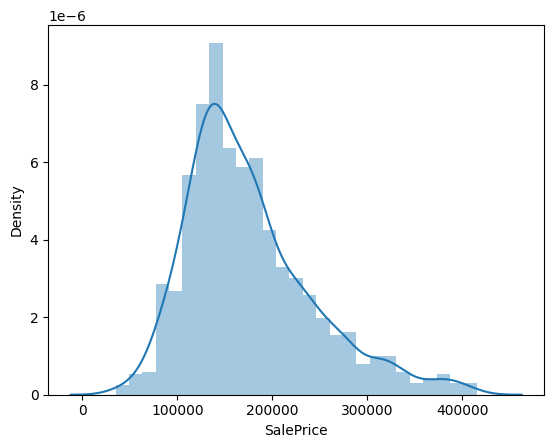

(1438, 82)

In [37]:
df['z_score']=df['SalePrice']-df['SalePrice'].mean()/df['SalePrice'].std()
new_df2=df[df['z_score']<max_range]

sns.distplot(new_df2['SalePrice'])
plt.show()

new_df2.shape

FeatureScaling on StandardScaler

In [57]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()

ss.fit(df[['SalePrice']])
df['SalePrice']=pd.DataFrame(ss.transform(df[['SalePrice']]))
df.head()
# sns.distplot(df['SalePrice'])
# plt.show()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,Unnamed: 8,Unnamed: 9,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,z_score
0,1.0,60.0,RL,65.0,8450.0,Pave,NaN,Reg,NaN,AllPub,...,NaN,NaN,NaN,0,2,2008,WD,Normal,0.347273,208497.722615
1,2.0,20.0,RL,NaN,9600.0,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2007,WD,Normal,0.007288,181497.722615
2,3.0,60.0,RL,68.0,NaN,Pave,NaN,IR1,NaN,AllPub,...,NaN,NaN,NaN,0,9,2008,WD,Normal,0.536154,223497.722615
3,4.0,70.0,RL,60.0,NaN,Pave,NaN,NaN,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,-0.515281,139997.722615
4,5.0,60.0,RL,84.0,14260.0,NaN,NaN,NaN,Lvl,AllPub,...,NaN,NaN,NaN,0,12,2008,WD,Normal,0.869843,249997.722615


MinMax Scaling

In [63]:
df=pd.read_csv('train_update.csv')
df.head()

from sklearn.preprocessing import MinMaxScaler
mm=MinMaxScaler()
mm.fit(df[['SalePrice']])
df['SalePrice_new']=pd.DataFrame(mm.transform(df[['SalePrice']]))
df.head()

# sns.distplot(df['SalePrice_new'])
# plt.show()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,Unnamed: 8,Unnamed: 9,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,SalePrice_new
0,1.0,60.0,RL,65.0,8450.0,Pave,NaN,Reg,NaN,AllPub,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,0.241078
1,2.0,20.0,RL,NaN,9600.0,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,0.203583
2,3.0,60.0,RL,68.0,NaN,Pave,NaN,IR1,NaN,AllPub,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,0.261908
3,4.0,70.0,RL,60.0,NaN,Pave,NaN,NaN,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,0.145952
4,5.0,60.0,RL,84.0,14260.0,NaN,NaN,NaN,Lvl,AllPub,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,0.298709
